# Assignment 10: Process Capability
Sydney Perrin

March 24th, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_csv('10 data.csv')
#df.head(100)

## 1. A high-level voltage power supply should have a nominal output voltage of 350 V. A sample of four units is selected each day and tested for process control purposes. The data shown in the dataset give the difference between the observed reading on each unit and the nominal voltage times ten; that is, Vol_i= (observed voltage on unit i - 350)*10. Set up X-bar and R charts. Is the process in statistical control?
ANS: See X-bar and R charts in the code below. Yes, the process is in statistical control because there are no points out of bounds in the control charts.

In [3]:
m=20 # Number of samples
n=4 # Sample size
df['V']=(df.Vol/10)+350

### R Chart Calculations

In [4]:
Rvalues = df.groupby(['Sample']).V.max()-df.groupby(['Sample']).V.min()
Rbar = np.mean(Rvalues)
CL_R = Rbar

# Control chart constants for n=4
D4 = 2.282
D3 = 0
A2 = 0.729
d2=2.059

UCL_R = D4*Rbar
LCL_R = D3*Rbar

print('CL_R=', CL_R)
print('UCL_R=', UCL_R)
print('LCL_R=', LCL_R)

CL_R= 0.6250000000000057
UCL_R= 1.426250000000013
LCL_R= 0.0


### Plot R Chart

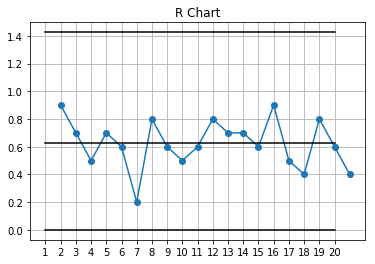

In [5]:
m=20
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R)
plt.plot(Rvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R Chart')
plt.show()

# There are no points out of bounds.

### X-bar Chart Calculations

In [6]:
xbarvalues = df.groupby(['Sample']).V.mean()
xbarbar = np.mean(xbarvalues)
CL_X = xbarbar
UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('CL_X=', CL_X)
print('UCL_X=', UCL_X)
print('LCL_X=', LCL_X)

CL_X= 351.0325
UCL_X= 351.488125
LCL_X= 350.57687500000003


### Plot X-bar Chart

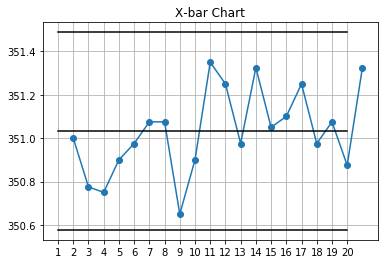

In [7]:
m=20
ucl_line = np.full(m,UCL_X) 
lcl_line = np.full(m,LCL_X) 
cl_line = np.full(m,CL_X)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart')
plt.show()

# There are no points out of bounds.

## 2. What is the estimate of the process mean?
ANS: The estimate of the process mean is mu=351.03

In [8]:
mu=xbarbar
print('mu=', mu)

mu= 351.0325


## 3. What is the estimate of the process standard deviation?
ANS: The estimate of the process standard deviation is sigma=0.304

In [9]:
sigma = Rbar/d2
print('sigma=', sigma)

sigma= 0.30354541039339755


## 4. What are the Natural Tolerance Limits for this process?
ANS: The upper natural tolerance limit is UNTL = 351.943 and the lower natural tolerance limit is LNTL = 350.122

In [10]:
UNTL = mu + 3*sigma
LNTL = mu - 3*sigma

print('UNTL=', UNTL)
print('LNTL=', LNTL)

UNTL= 351.94313623118023
LNTL= 350.1218637688198


## 5. If the specifications are USL = 352V, LSL = 348V, what is the value of Cp?
ANS: The value is Cp = 2.2

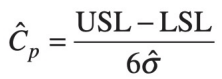

In [11]:
USL = 352
LSL = 348

Cp = (USL-LSL)/(6*sigma)
print ('Cp=', Cp)

Cp= 2.1962666666666473


## 6. Is the basic capability requirement met (i.e., is the process capable)? Explain.
ANS: Yes, the basic capability requirement is met. The value of Cp=2.2 which is greater than 1. This means that units are falling within the upper and lower specification limits. 45.53% of the available capability is being used. The lower this is the more flexibility there is in the system.

In [12]:
print('Cp=', Cp) 

P=(1/Cp)*100 # P is percentage of range between upper and lower specification limit using
print('P=', P, '%')

Cp= 2.1962666666666473
P= 45.531811559009626 %


## 7. What is the process fallout?
ANS: The process fallout is pf = 718 ppm

In [13]:
pf = 1-(stat.norm.cdf(USL, mu, sigma)-stat.norm.cdf(LSL, mu, sigma))
pf = 1000000*pf # Convert to ppm
print('pf=', pf)

pf= 717.9592415320624


## 8. What is the value of CPK?
ANS: The value is Cpk = 1.062

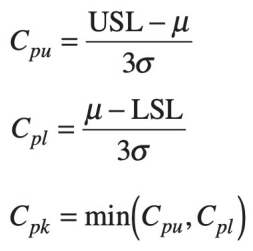

In [14]:
Cpu = (USL-mu)/(3*sigma)
print('Cpu=',Cpu)

Cpl = (mu - LSL)/(3*sigma)
print('Cpl=',Cpl)

Cpk = min(Cpu, Cpl)
print('Cpk=',Cpk)

Cpu= 1.0624439999999606
Cpl= 3.3300893333333335
Cpk= 1.0624439999999606


## 9. What is the best approximation of the process fallout if you calculate using CPK?
ANS: The approximation of the process fallout using CPK is pf=718 ppm

In [15]:
# Use mu=0 and variance=1
pf = 1-stat.norm.cdf(3*Cpk, 0, 1)
pf = 1000000*pf # Convert to ppm
print('pf=',pf)

pf= 717.9592415320624


## 10. Is the process centred? Explain.
ANS: No, the process is not centered. To explain, Cpu is not equal to Cpl.

In [16]:
print('Cpu=', Cpu) 
print('Cpl=', Cpl) 

Cpu= 1.0624439999999606
Cpl= 3.3300893333333335


## 11. What is the value of CPM?
ANS: The value is CPM=0.619

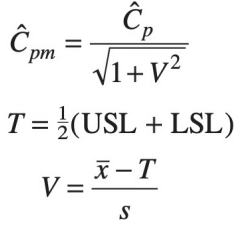

In [17]:
T = 0.5*(USL+LSL)
V = (mu - T)/sigma
Cpm = Cp/np.sqrt(1+V*V)
print('Cpm=', Cpm)

Cpm= 0.6194663187960754
